In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#pip install tabulate

Note: you may need to restart the kernel to use updated packages.


Michigan Crime Data: Regional Totals
╒═══════════╤═══════════╤══════════════════╤═════════════════════╕
│ Region    │   Murders │   Violent Crimes │   Nonviolent Crimes │
╞═══════════╪═══════════╪══════════════════╪═════════════════════╡
│ South     │      5018 │           331011 │             2080097 │
├───────────┼───────────┼──────────────────┼─────────────────────┤
│ West      │      2605 │           259401 │             1781665 │
├───────────┼───────────┼──────────────────┼─────────────────────┤
│ Northeast │      1674 │           156891 │              760200 │
├───────────┼───────────┼──────────────────┼─────────────────────┤
│ Midwest   │      3304 │           211854 │             1226462 │
╘═══════════╧═══════════╧══════════════════╧═════════════════════╛


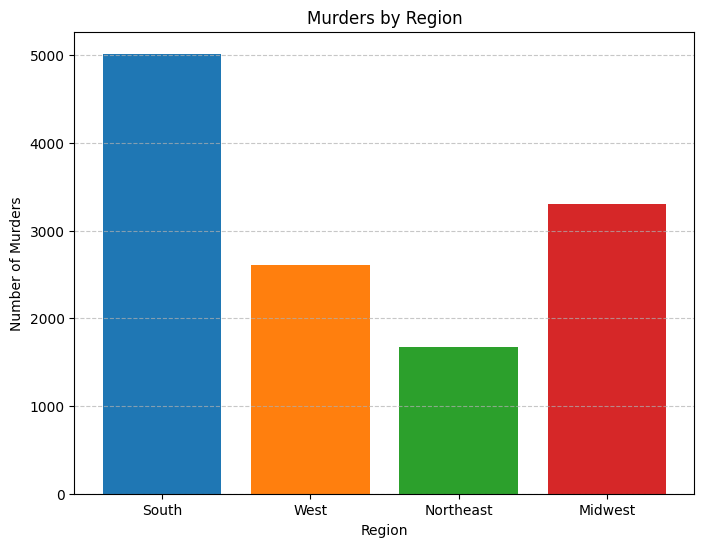

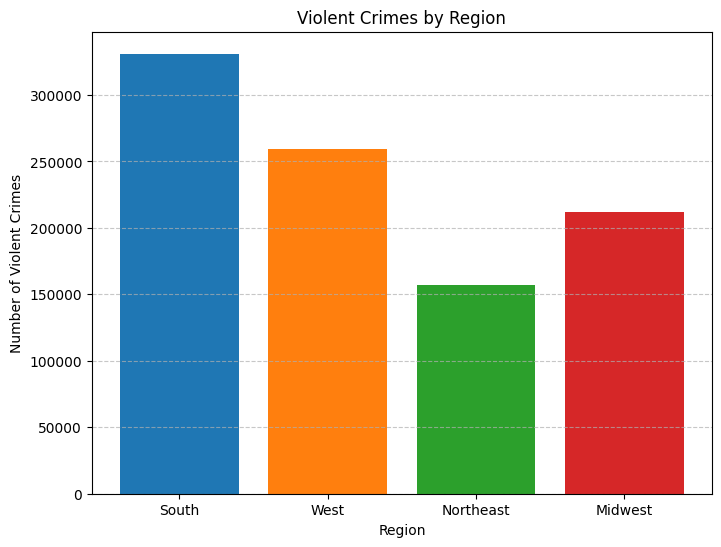

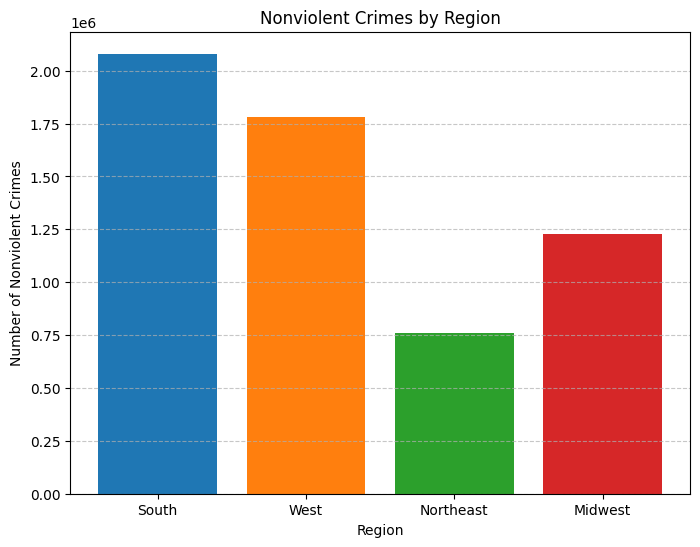

In [22]:
import json
import matplotlib.pyplot as plt
from tabulate import tabulate

try:
    with open("FBI_CrimeData_2016.json", "r") as file:
        crime_list = json.load(file)
except FileNotFoundError:
    print("Error: The file 'FBI_CrimeData_2016.json' was not found.")
    crime_list = []

region_colors = {
    "South": "#1f77b4",  # Color Picker, Blue
    "West": "#ff7f0e",   # Color Picker, Orange
    "Northeast": "#2ca02c",  # Color Picker, Green
    "Midwest": "#d62728"  # Color Picker, Red
}

murder_by_region = {}
violent_by_region = {}
nonviolent_by_region = {}

for entry in crime_list:
    region = entry["Region"]
    
    try:
        murder = int(entry["Murder"])
        violent_crimes = sum(int(entry[crime]) for crime in ["Murder", "Rape", "Robbery", "Assault"])
        nonviolent_crimes = sum(int(entry[crime]) for crime in ["Burglary", "Theft", "Vehicle_Theft"])
    except ValueError:
        continue

    murder_by_region[region] = murder_by_region.get(region, 0) + murder
    violent_by_region[region] = violent_by_region.get(region, 0) + violent_crimes
    nonviolent_by_region[region] = nonviolent_by_region.get(region, 0) + nonviolent_crimes

table_data = []
regions = ["South", "West", "Northeast", "Midwest"]

for region in regions:
    table_data.append([
        region,
        murder_by_region.get(region, 0),
        violent_by_region.get(region, 0),
        nonviolent_by_region.get(region, 0)
    ])

table_headers = ["Region", "Murders", "Violent Crimes", "Nonviolent Crimes"]
print("Michigan Crime Data: Regional Totals")
print(tabulate(table_data, headers=table_headers, tablefmt="fancy_grid"))

def create_bar_chart(data, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    
    colors = [region_colors[region] for region in data.keys()]
    
    plt.bar(data.keys(), data.values(), color=colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

create_bar_chart(murder_by_region, "Murders by Region", "Region", "Number of Murders")
create_bar_chart(violent_by_region, "Violent Crimes by Region", "Region", "Number of Violent Crimes")
create_bar_chart(nonviolent_by_region, "Nonviolent Crimes by Region", "Region", "Number of Nonviolent Crimes")


╒══════════════════════╤══════════════════╤════════════════════════════════════════╕
│ State                │   Violent Crimes │   Distance from National State Average │
╞══════════════════════╪══════════════════╪════════════════════════════════════════╡
│ ALABAMA              │            15350 │                                   3457 │
├──────────────────────┼──────────────────┼────────────────────────────────────────┤
│ ALASKA               │             4697 │                                  14110 │
├──────────────────────┼──────────────────┼────────────────────────────────────────┤
│ ARIZONA              │            23856 │                                   5049 │
├──────────────────────┼──────────────────┼────────────────────────────────────────┤
│ ARKANSAS             │            12048 │                                   6759 │
├──────────────────────┼──────────────────┼────────────────────────────────────────┤
│ CALIFORNIA           │           145205 │                      

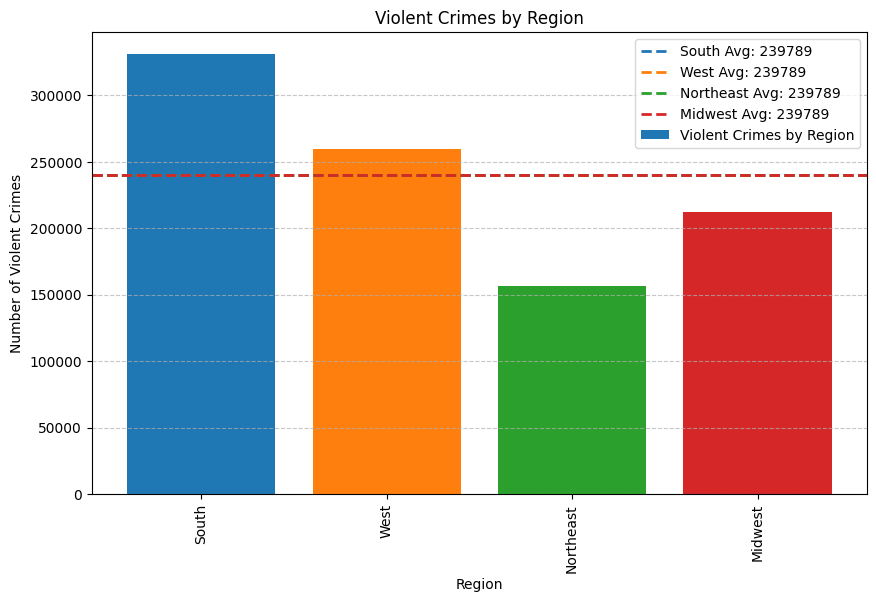

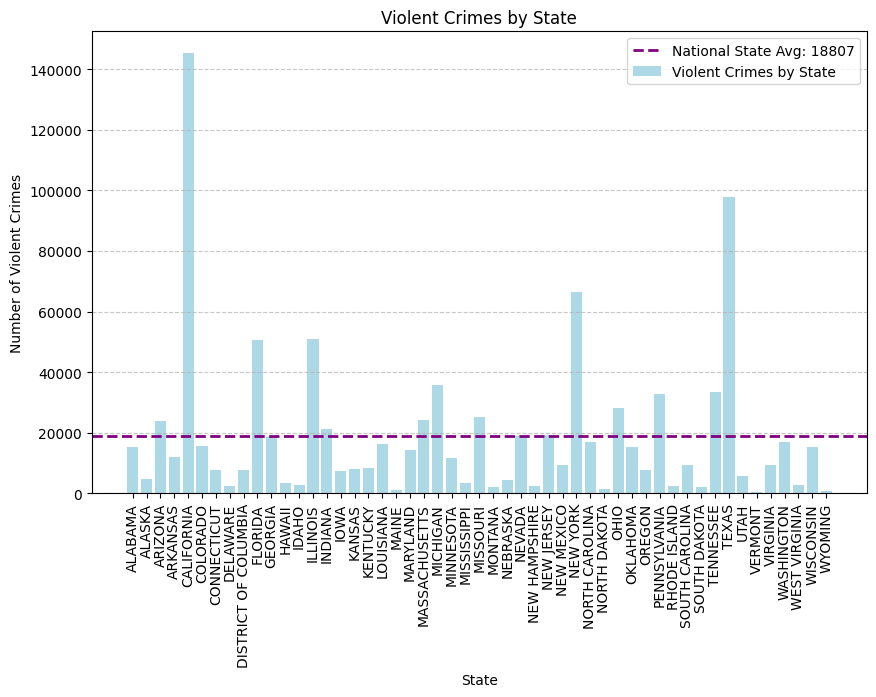

In [7]:
try:
    with open("FBI_CrimeData_2016.json", "r") as file:
        crime_list = json.load(file)
except FileNotFoundError:
    print("Error: The file 'FBI_CrimeData_2016.json' was not found.")
    crime_list = []

region_colors = {
    "South": "#1f77b4",  # Color Picker, Blue
    "West": "#ff7f0e",   # Color Picker, Orange
    "Northeast": "#2ca02c",  # Color Picker, Green
    "Midwest": "#d62728"  # Color Picker, Red
}

murder_by_region = {}
violent_by_region = {}
nonviolent_by_region = {}
state_violent_crimes = {}

for entry in crime_list:
    region = entry["Region"]
    state = entry["State"]
    
    try:
        murder = int(entry["Murder"])
        violent_crimes = sum(int(entry[crime]) for crime in ["Murder", "Rape", "Robbery", "Assault"])
        nonviolent_crimes = sum(int(entry[crime]) for crime in ["Burglary", "Theft", "Vehicle_Theft"])
    except ValueError:
        continue

    murder_by_region[region] = murder_by_region.get(region, 0) + murder
    violent_by_region[region] = violent_by_region.get(region, 0) + violent_crimes
    nonviolent_by_region[region] = nonviolent_by_region.get(region, 0) + nonviolent_crimes
    
    state_violent_crimes[state] = state_violent_crimes.get(state, 0) + violent_crimes

regional_averages = {region: sum(violent_by_region[region] for region in region_colors) // len(region_colors) for region in region_colors}

national_state_average_violent = sum(state_violent_crimes.values()) // len(state_violent_crimes)

state_distance_from_mean = {state: abs(violent - national_state_average_violent) for state, violent in state_violent_crimes.items()}

table_data = []
for state, violent_crimes in state_violent_crimes.items():
    distance_from_mean = state_distance_from_mean.get(state, 0)
    table_data.append([
        state,
        violent_crimes,
        distance_from_mean
    ])

table_headers = ["State", "Violent Crimes", "Distance from National State Average"]
print(tabulate(table_data, headers=table_headers, tablefmt="fancy_grid"))

def create_bar_chart(data, title, xlabel, ylabel, averages=None):
    plt.figure(figsize=(10, 6))
    
    colors = [region_colors.get(region, "#000000") for region in data.keys()]
    
    bars = plt.bar(data.keys(), data.values(), color=colors, label="Violent Crimes by Region")
    
    if averages is not None:
        for region, avg in averages.items():
            plt.axhline(avg, color=region_colors.get(region, "#000000"), linestyle='dashed', linewidth=2, label=f"{region} Avg: {avg}")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=90)
    plt.show()

create_bar_chart(violent_by_region, "Violent Crimes by Region", "Region", "Number of Violent Crimes", averages=regional_averages)

def create_state_chart():
    plt.figure(figsize=(10, 6))
    
    bars = plt.bar(state_violent_crimes.keys(), state_violent_crimes.values(), color="lightblue", label="Violent Crimes by State")
    
    plt.axhline(national_state_average_violent, color="purple", linestyle="dashed", linewidth=2, label=f"National State Avg: {national_state_average_violent}")
    
    plt.title("Violent Crimes by State")
    plt.xlabel("State")
    plt.ylabel("Number of Violent Crimes")
    plt.legend()
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

create_state_chart()


Michigan Crime Data: Total
╒═══════════════╤═══════════════╕
│ Crime Type    │   Total Count │
╞═══════════════╪═══════════════╡
│ Murder        │           510 │
├───────────────┼───────────────┤
│ Rape          │          4044 │
├───────────────┼───────────────┤
│ Robbery       │          6594 │
├───────────────┼───────────────┤
│ Assault       │         24642 │
├───────────────┼───────────────┤
│ Burglary      │         29736 │
├───────────────┼───────────────┤
│ Theft         │         98990 │
├───────────────┼───────────────┤
│ Vehicle_Theft │         17653 │
╘═══════════════╧═══════════════╛
Michigan Crime Data: Per City
╒══════════════════════════════════════╤══════════╤════════╤═══════════╤═══════════╤════════════╤═════════╤═════════════════╕
│ City                                 │   Murder │   Rape │   Robbery │   Assault │   Burglary │   Theft │   Vehicle_Theft │
╞══════════════════════════════════════╪══════════╪════════╪═══════════╪═══════════╪════════════╪═════════╪══════

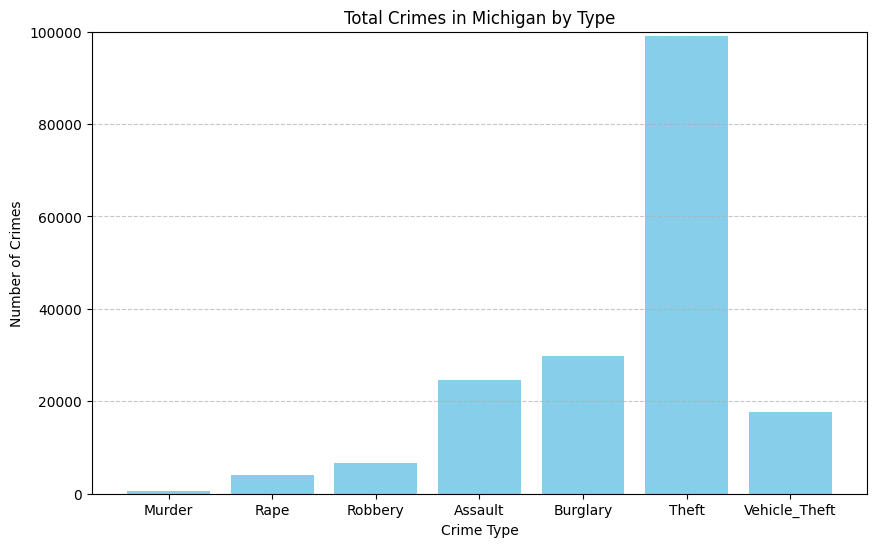

In [21]:
import json
import matplotlib.pyplot as plt
from tabulate import tabulate

try:
    with open("FBI_CrimeData_2016.json", "r") as file:
        crime_list = json.load(file)
except FileNotFoundError:
    print("Error: The file 'FBI_CrimeData_2016.json' was not found.")
    crime_list = []

michigan_crimes = [entry for entry in crime_list if entry["State"].upper() == "MICHIGAN"]

total_crimes_michigan = {
    "Murder": 0,
    "Rape": 0,
    "Robbery": 0,
    "Assault": 0,
    "Burglary": 0,
    "Theft": 0,
    "Vehicle_Theft": 0
}

city_crimes = {}

for entry in michigan_crimes:
    city = entry["City"]
    for crime_type in total_crimes_michigan.keys():
        try:
            crime_count = int(entry[crime_type])
            total_crimes_michigan[crime_type] += crime_count
            if city not in city_crimes:
                city_crimes[city] = {crime: 0 for crime in total_crimes_michigan.keys()}
            city_crimes[city][crime_type] += crime_count
        except ValueError:
            continue

table_data = [
    [crime, count] for crime, count in total_crimes_michigan.items()
]
print("Michigan Crime Data: Total")
print(tabulate(table_data, headers=["Crime Type", "Total Count"], tablefmt="fancy_grid"))

city_table_data = [
    [city] + [counts[crime] for crime in total_crimes_michigan.keys()]
    for city, counts in city_crimes.items()
]
city_headers = ["City"] + list(total_crimes_michigan.keys())
print("Michigan Crime Data: Per City")
print(tabulate(city_table_data, headers=city_headers, tablefmt="fancy_grid"))

def plot_crime_totals(data, title, xlabel, ylabel, y_limit=None):
    plt.figure(figsize=(10, 6))
    plt.bar(data.keys(), data.values(), color="skyblue")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if y_limit:
        plt.ylim(0, y_limit)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_crime_totals(
    total_crimes_michigan,
    "Total Crimes in Michigan by Type",
    "Crime Type",
    "Number of Crimes",
    y_limit=100000
)
